In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
from sklearn import preprocessing
from pandas import DataFrame

In [23]:
train_df = pd.read_csv("C:/Users/Dell/Dropbox (Old)/My PC (DESKTOP-9I2HO18)/Downloads/mnist_train_small.csv")

Standardisation = preprocessing.StandardScaler()

In [24]:
def sigmoid(z):
    return (1.0 / (1 + np.exp(-z)))

In [25]:
def tanh(z):
    t=(np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
    return t

In [26]:
def dtanh(z):
    t=(np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
    dt=1-t**2
    return dt

In [27]:
def relu(z):
    return np.maximum(z, 0)

In [28]:
def derir(z):
    z[z<0] = 0
    z[z>=0] = 1
    return z


In [29]:
num_col=train_df.shape[1]-1

In [30]:
num_row=train_df.shape[0]

In [31]:
x_train=train_df.drop(["6"],axis=1)

In [32]:
x_train=x_train.to_numpy()

x_train=Standardisation.fit_transform(x_train)

In [33]:
x_train=x_train.reshape((num_col,num_row))

In [34]:
x_train.shape

(784, 19999)

In [35]:
y_train=train_df["6"]

In [36]:
y_train=y_train.to_numpy()

In [37]:
y_train=y_train.reshape(1,num_row)

In [38]:
y_train.shape

(1, 19999)

In [39]:
y_train

array([[5, 7, 9, ..., 2, 9, 5]], dtype=int64)

In [41]:
y_com=np.zeros((10,num_row))

In [42]:
for i in range(0,num_row):
    o=y_train[0][i]
    y_com[o][i]=1

In [43]:
class neural_network:
    def __init__(self,x_train,y_com,no_of_iters,learn_rate,a,b):
        self.x_train=x_train
        self.y_com=y_com
        #self.change=number
        self.numrain=no_of_iters
        self.rate=learn_rate
        self.num_row=a
        self.num_col=b
    def training(self):
        w1=(np.random.randn(self.num_col,self.num_col))*0.01
        w2=(np.random.randn(self.num_col,self.num_col))*0.01
        w3=(np.random.randn(10,self.num_col))*0.01
        b1=np.random.randn(self.num_col,1)
        b2=np.random.randn(self.num_col,1)
        b3=np.random.randn(10,1)
        
        
        for i in range(0,self.numrain):
            w3t=np.transpose(w3)
            w2t=np.transpose(w2)
            
            z1=(np.dot(w1,self.x_train))+b1
            a1=relu(z1)
            a1t=np.transpose(a1)
         
            
            z2=(np.dot(w2,a1))+b2
            a2=relu(z2)
            a2t=np.transpose(a2)   
            
            z3=(np.dot(w3,a2))+b3
            a3=sigmoid(z3)
            
            dz3=(a3-self.y_com)
            dw3=(np.dot(dz3,a2t))/self.num_row
            db3=(np.sum(dz3,axis=1,keepdims=True))/self.num_row
            
            dz2=(np.dot(w3t,dz3))*(derir(z2))
            dw2=(np.dot(dz2,a1t))/self.num_row
            db2=(np.sum(dz2,axis=1,keepdims=True))/self.num_row
            
            dz1=(np.dot(w2t,dz2))*(derir(z1))
            dw1=(np.dot(dz1,np.transpose(self.x_train)))/self.num_row
            db1=(np.sum(dz1,axis=1,keepdims=True))/self.num_row
            
            w3=w3-(self.rate*(dw3))
            b3=b3-(self.rate*(db3))
            w2=w2-(self.rate*(dw2))
            b2=b2-(self.rate*(db2))
            w1=w1-(self.rate*(dw1))
            b1=b1-(self.rate*(db1))
            cost=(1/2*self.num_row)*np.sum(np.square(a3-self.y_com))
            plt.scatter(i,cost,c="red")
        w=[w1,w2,w3]
        b=[b1,b2,b3]
        return w,b
            
            
            
            

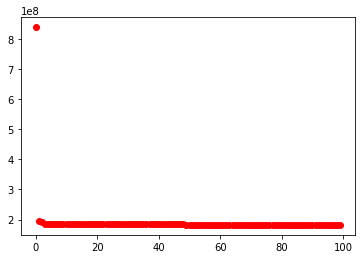

In [44]:
w=neural_network(x_train,y_com,100,0.001,num_row,num_col).training()

In [45]:
w1=w[0][0]

In [46]:
w2=w[0][1]

In [47]:
w3=w[0][2]

In [48]:
b1=w[1][0]

In [49]:
b2=w[1][1]

In [50]:
b3=w[1][2]

In [51]:
test_df = pd.read_csv("C:/Users/Dell/Dropbox (Old)/My PC (DESKTOP-9I2HO18)/Downloads/mnist_test.csv")

In [52]:
num_col1=test_df.shape[1]-1

In [53]:
num_row1=test_df.shape[0]

In [54]:
feat1=test_df.drop(["7"],axis=1) 

In [55]:
x_test=feat1.to_numpy()

x_test=Standardisation.fit_transform(x_test)

In [56]:
x_test=x_test.reshape(784,9999)

In [57]:
ydata1=test_df["7"]

In [58]:
y_test=ydata1.to_numpy()
y_test=y_test.astype('int') 

In [59]:
y_test=y_test.reshape(1,num_row1)

In [60]:
def predict():
            
    z1=(np.dot(w1,x_test))+b1
    a1=relu(z1)
    a1t=np.transpose(a1)
         
    z2=(np.dot(w2,a1))+b2
    a2=relu(z2)
    a2t=np.transpose(a2)   
            
    z3=(np.dot(w3,a2))+b3
    a3=sigmoid(z3)
    
    return a3
            
    

In [61]:
a3=predict()
a3             

array([[0.179988  , 0.16305866, 0.12977526, ..., 0.1072182 , 0.14176766,
        0.1263909 ],
       [0.14683687, 0.14586131, 0.13844293, ..., 0.1099741 , 0.18872992,
        0.20586663],
       [0.04121369, 0.04146191, 0.04656218, ..., 0.04042648, 0.08033215,
        0.11865911],
       ...,
       [0.19168999, 0.21150226, 0.16886055, ..., 0.11327804, 0.13042215,
        0.11600506],
       [0.04951671, 0.04960239, 0.05300813, ..., 0.10747888, 0.0700003 ,
        0.08343239],
       [0.15357054, 0.14064426, 0.11272799, ..., 0.16199012, 0.09110241,
        0.0668819 ]])

In [62]:
y_ans=a3.argmax(axis=0)
y_ans=y_ans.reshape(1,num_row1)


In [63]:
y_ans

array([[4, 7, 7, ..., 9, 1, 1]], dtype=int64)

In [64]:
y_ans.shape

(1, 9999)

In [65]:
y_test.shape

(1, 9999)

In [66]:
count=0
for i in range(0,num_row1):
    if y_test[0][i]==y_ans[0][i]:
        count+=1

In [67]:
accuracy=((count/num_row1)*100)
accuracy

9.37093709370937